In [25]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [26]:
import pytesseract
import shutil
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image
import easyocr
try:
    from PIL import Image
except ImportError:
    import Image

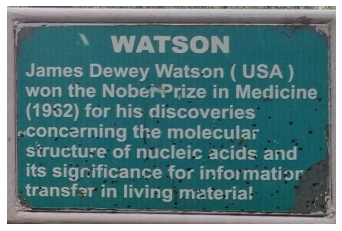

In [27]:
ori_image = cv2.imread('watson.jpg')

ori_img = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)
plt.imshow(ori_img)
plt.axis('off')
plt.show()

fixed_img = cv2.resize(ori_img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
# plt.imshow(fixed_img)
# plt.axis("off")

ogimg = cv2.cvtColor(fixed_img, cv2.COLOR_RGB2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(ogimg, kernel, iterations=1)
# plt.imshow(dilation)
# plt.axis("off")

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
erosion= cv2.erode(dilation, kernel, iterations=1)
# plt.imshow(erosion)
# plt.axis("off")

binary = cv2.threshold(cv2.medianBlur(erosion, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# plt.imshow(binary)
# plt.axis("off")

gsbin = binary.astype(np.uint8)
# gsbin= 255 * gsbin
# plt.imshow(gsbin)

image2 = cv2.cvtColor(255-gsbin, cv2.COLOR_GRAY2RGB)
# plt.imshow(image2)
# plt.axis('off')
# plt.show()
# kernel = np.array([[-1, -1, -1],
#                 [-1, 5,-1],
#                 [-1, -1, -1]])
# final_img = cv2.filter2D(src=image2, ddepth=-1, kernel=kernel)


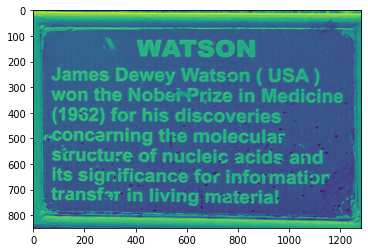

In [28]:
plt.imshow(dilation)

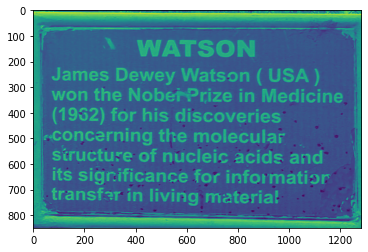

In [29]:
plt.imshow(erosion)

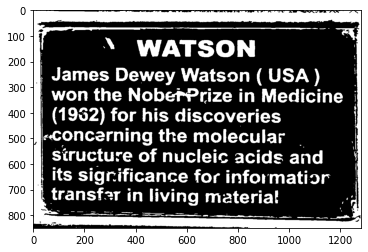

In [30]:
plt.imshow(binary,cmap='gray')


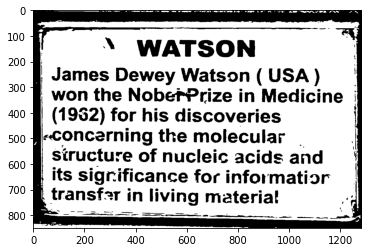

In [31]:
plt.imshow(image2)

In [32]:
extractedInformation = pytesseract.image_to_string(image2,lang='eng')
extractedInformation1 = extractedInformation.replace('\n', ' ')

print(extractedInformation)

‘ WATSON

 James Dewey Watson ( USA) 
5 won the Nobei-Prize in Medicine i
(1962) for his discoveries

1 «concerning the molecular ,_
structure of nucleic acids and
its signiﬁcance for information

 




In [33]:
print(extractedInformation1)

‘ WATSON   James Dewey Watson ( USA)  5 won the Nobei-Prize in Medicine i (1962) for his discoveries  1 «concerning the molecular ,_ structure of nucleic acids and its signiﬁcance for information     


In [34]:
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
from langdetect import detect
lang = detect(extractedInformation)
print(lang)

en


In [36]:
%pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
from textblob import TextBlob

In [44]:
tb_txt = TextBlob(extractedInformation1)

correctedTBText = tb_txt.correct()
correctedText = str(correctedTBText)

print(correctedText)

‘ WATSON   James Dewey Watson ( USA)  5 won the Obey-Prize in Medicine i (1962) for his discoveries  1 «concerning the molecular ,_ structure of nuclei acids and its significance for information     


In [46]:
import language_tool_python
spelltool = language_tool_python.LanguageTool('en-US') 
correctedText = spelltool.correct(extractedInformation1)
print("Corrected Text:"+str(correctedText)+"\n")

Unzipping C:\Users\srira\AppData\Local\Temp\tmp9xgsjngq.zip to C:\Users\srira\.cache\language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to C:\Users\srira\.cache\language_tool_python.


Corrected Text:‘ WATSON James Dewey Watson (USA) 5 won the Notarize in Medicine i (1962) for his discoveries 1 «concerning the molecular, _ structure of nucleic acids and its signiﬁcance for information 



In [45]:
%pip install language_tool_python


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
